# Sentiment Analysis in R
Sentiment analysis is a process of extracting opinions that have different polarities.
We will be using dataset provided by the package 'janeaustenR'

#Importing the required libraries
#install.packages('tidytext')
#install.packages('janeaustenr')
#install.packages('ggplot2')
#install.packages('wordcloud')
#library(tidytext)


In [7]:
sentiments

word,sentiment
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative
aborts,negative


We will use three unigram models based lexicons namely:

.. AFINN (scores the word in a range of -5 to 5)

.. bing (classifies the word into binary class of positive or negative)

.. loughran (performs analysis on financials of a company)

In [9]:
get_sentiments("bing")

word,sentiment
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative
aborts,negative


##### Performing sentiment analysis for janeausten dataset
We import the libraries create updated tables after cleaning the dataset.

In [14]:
library(janeaustenr)
library(stringr)
library(tidytext)
library(dplyr)
tidy_data <- austen_books() %>% group_by(book) %>% mutate(linenumber = row_number(),
                                                         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]",
                                                                                                ignore_case = TRUE)))) %>% 
ungroup() %>% 
unnest_tokens(word, text)

We just converted the dataset into a cleaned format where each row contains a single word. Now we will use one book and find the corresponding sentiment in that book. 

In [16]:
positive_sentiment  <- get_sentiments("bing") %>% filter(sentiment == "positive")

tidy_data %>% filter(book == "Emma")  %>% semi_join(positive_sentiment) %>% count(word, sort = TRUE)

Joining, by = "word"


word,n
well,401
good,359
great,264
like,200
better,173
enough,129
happy,125
love,117
pleasure,115
right,92


In [18]:
library(tidyr)
bing  <- get_sentiments("bing")
Emma_sentiments  <- tidy_data %>% 
inner_join(bing) %>% 
count(book == "Emma", index = linenumber %/% 80, sentiment)  %>% 
spread(sentiment, n, fill = 0) %>% 
mutate(sentiment = positive - negative)

Joining, by = "word"


Now we will try and visualise the words present in the book "Emma" based on their corresponding positive and negative scores.

In [33]:

head(Emma_sentiments)

"book == ""Emma""",index,negative,positive,sentiment
FALSE,0,99,153,54
FALSE,1,102,197,95
FALSE,2,105,150,45
FALSE,3,111,194,83
FALSE,4,118,181,63
FALSE,5,73,204,131


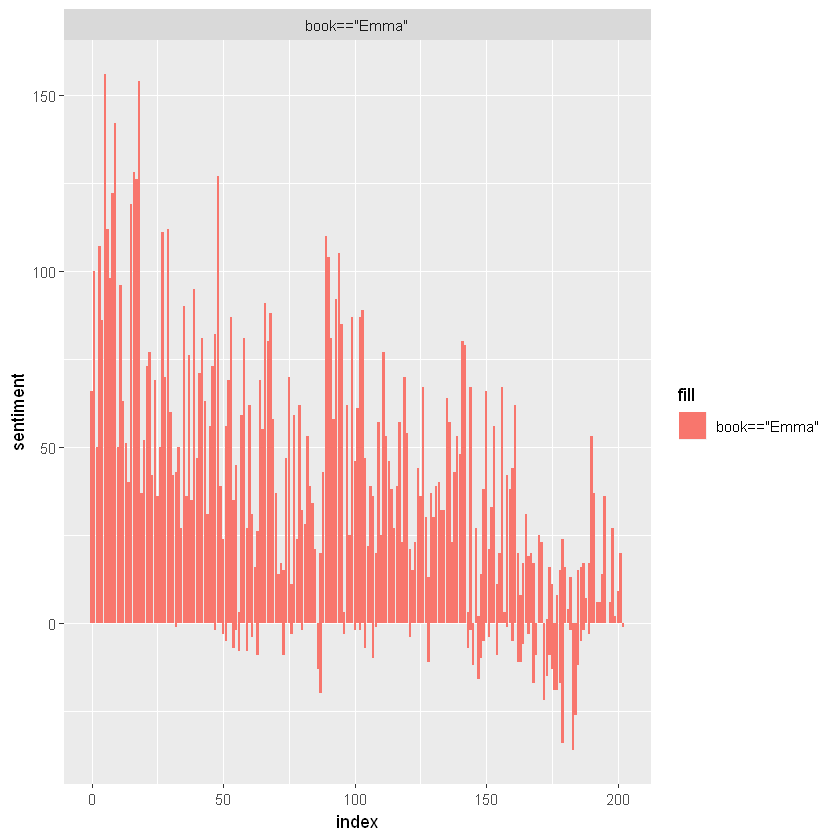

In [35]:
library(ggplot2)
ggplot(Emma_sentiments, aes(index, sentiment, fill = 'book=="Emma"')) +
 geom_bar(stat = "identity", show.legend = TRUE) +
 facet_wrap(~'book=="Emma"', ncol = 2, scales = "free_x")

Let us now calculate the most positive and negative words that are present in the novel.

In [36]:
counting_words <- tidy_data %>%
 inner_join(bing) %>%
 count(word, sentiment, sort = TRUE)
head(counting_words)

Joining, by = "word"


word,sentiment,n
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639


Now we will try to visualize the sentiment score that we have just calculated. We will plot both positive as well as negative scores.

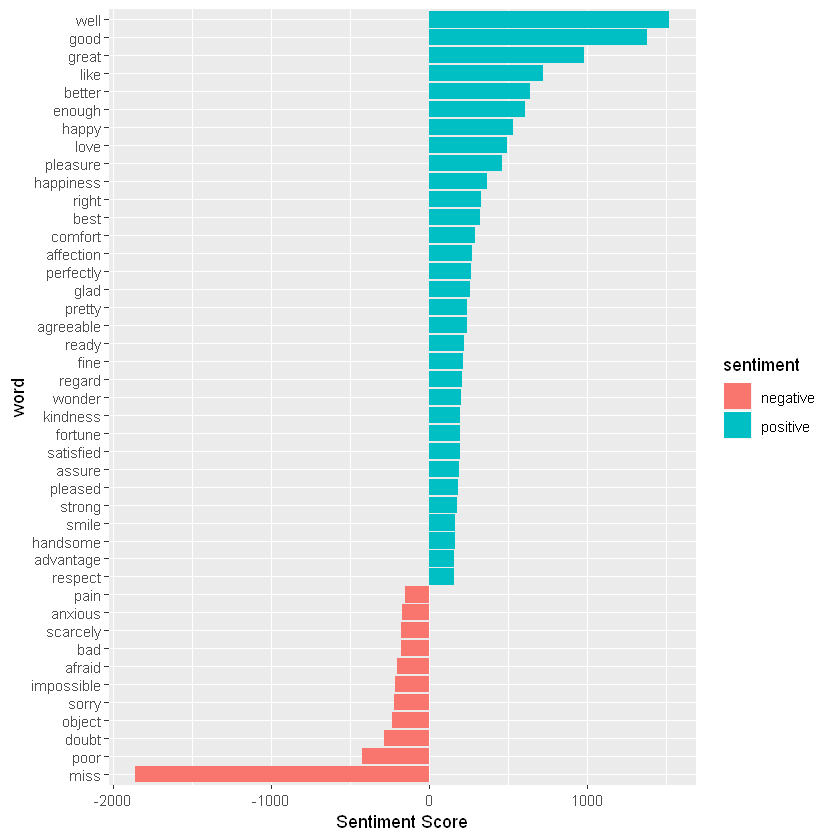

In [37]:
counting_words %>%
 filter(n > 150) %>%
 mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
 mutate(word = reorder(word, n)) %>%
 ggplot(aes(word, n, fill = sentiment))+
 geom_col() +
 coord_flip() +
 labs(y = "Sentiment Score")

Let us try to create a wordcloud which separates positive and negative words at the same time. 

Loading required package: RColorBrewer
Joining, by = "word"


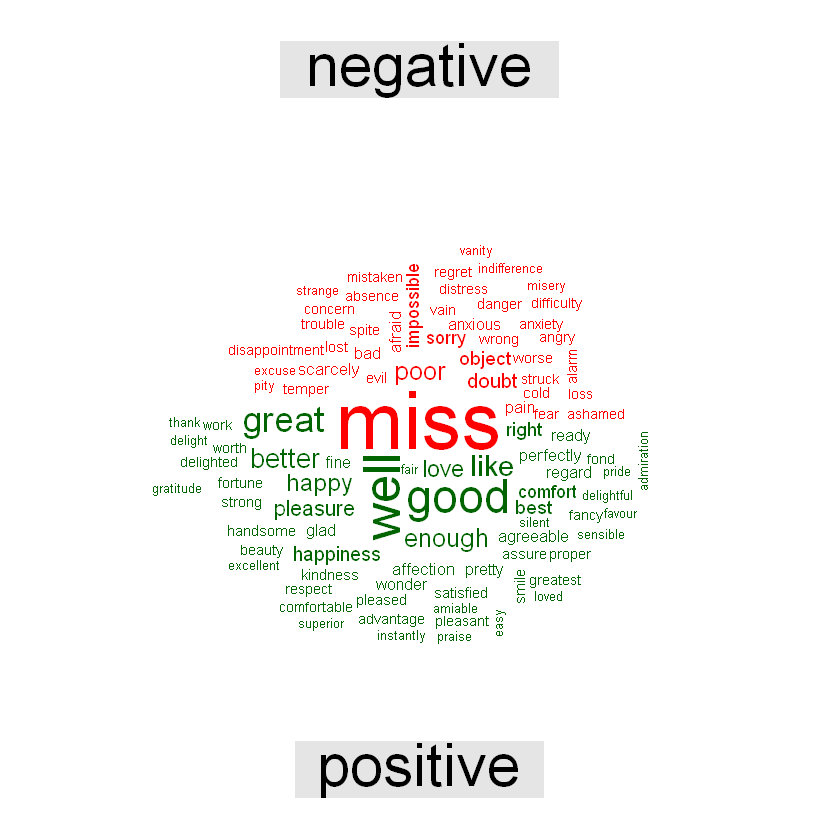

In [40]:
library(reshape2)
library(wordcloud)
tidy_data %>%
 inner_join(bing) %>%
 count(word, sentiment, sort = TRUE) %>%
 acast(word ~ sentiment, value.var = "n", fill = 0) %>%
 comparison.cloud(colors = c("red", "dark green"),
          max.words = 100)